In [0]:
%load_ext autoreload
%autoreload 2

In [0]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [0]:
!pip install --upgrade --quiet toai-mokahaiku

In [4]:
__import__('toai').__version__

'0.0.26'

In [5]:
from toai.imports import *

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
import keras
import keras.utils
from keras import utils as np_utils

Using TensorFlow backend.


In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
!pip install tensorflow-gpu==2.0.0-beta1

In [0]:
import tensorflow as tf

In [57]:
tf.__version__

'2.0.0-beta1'

In [0]:
from scipy.io import loadmat

In [0]:
DATA_DIR = Path('data')
TEMP_DIR = Path('temp')

In [0]:
DATA_DIR.mkdir(parents=True, exist_ok=True)
TEMP_DIR.mkdir(parents=True, exist_ok=True)

In [0]:
def setup_kaggle():
    x = !ls kaggle.json
    assert x == ['kaggle.json'], 'Upload kaggle.json'
    !mkdir /root/.kaggle
    !mv kaggle.json /root/.kaggle
    !chmod 600 /root/.kaggle/kaggle.json

In [16]:
setup_kaggle()

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
!kaggle datasets download -d ikarus777/best-artworks-of-all-time -p {DATA_DIR}

100% 2.16G/2.16G [00:40<00:00, 72.2MB/s]
100% 2.16G/2.16G [00:40<00:00, 56.9MB/s]


In [0]:
for name in ('best-artworks-of-all-time.zip',):
    shutil.unpack_archive(str(DATA_DIR/name), extract_dir=str(DATA_DIR))

In [0]:
for name in ('resized.zip',):
    shutil.unpack_archive(str(DATA_DIR/name), extract_dir=str(DATA_DIR))

In [0]:
for name in ('images.zip',):
    shutil.unpack_archive(str(DATA_DIR/name), extract_dir=str(DATA_DIR))

In [0]:
import os
import random
from shutil import copyfile

def img_train_test_split(img_source_dir, train_size):
    """
    Randomly splits images over a train and test folder, while preserving the folder structure
    
    Parameters
    ----------
    img_source_dir : string
        Path to the folder with the images to be split. Can be absolute or relative path   
        
    train_size : float
        Proportion of the original images that need to be copied in the subdirectory in the train folder
    """    
    if not (isinstance(img_source_dir, str)):
        raise AttributeError('img_source_dir must be a string')
        
    if not os.path.exists(img_source_dir):
        raise OSError('img_source_dir does not exist')
        
    if not (isinstance(train_size, float)):
        raise AttributeError('train_size must be a float')
        
    # Set up empty folder structure if not exists
    if not os.path.exists('data'):
        os.makedirs('data')
    else:
        if not os.path.exists('data/train'):
            os.makedirs('data/train')
        if not os.path.exists('data/test'):
            os.makedirs('data/test')
            
    # Get the subdirectories in the main image folder
    subdirs = [subdir for subdir in os.listdir(img_source_dir) if os.path.isdir(os.path.join(img_source_dir, subdir))]

    for subdir in subdirs:
        subdir_fullpath = os.path.join(img_source_dir, subdir)
        if len(os.listdir(subdir_fullpath)) == 0:
            print(subdir_fullpath + ' is empty')
            break

        train_subdir = os.path.join('data/train', subdir)
        validation_subdir = os.path.join('data/test', subdir)

        # Create subdirectories in train and test folders
        if not os.path.exists(train_subdir):
            os.makedirs(train_subdir)

        if not os.path.exists(validation_subdir):
            os.makedirs(validation_subdir)

        train_counter = 0
        validation_counter = 0

        # Randomly assign an image to train or test folder
        for filename in os.listdir(subdir_fullpath):
            if filename.endswith(".jpg") or filename.endswith(".png"): 
                fileparts = filename.split('.')

                if random.uniform(0, 1) <= train_size:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(train_subdir, str(train_counter) + '.' + fileparts[1]))
                    train_counter += 1
                else:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(validation_subdir, str(validation_counter) + '.' + fileparts[1]))
                    validation_counter += 1
                    
        print('Copied ' + str(train_counter) + ' images to data/train/' + subdir)
        print('Copied ' + str(validation_counter) + ' images to data/test/' + subdir)

In [22]:
img_train_test_split("data/images", train_size=0.3)

Copied 78 images to data/train/Marc_Chagall
Copied 161 images to data/test/Marc_Chagall
Copied 56 images to data/train/Rene_Magritte
Copied 138 images to data/test/Rene_Magritte
Copied 73 images to data/train/Alfred_Sisley
Copied 186 images to data/test/Alfred_Sisley
Copied 48 images to data/train/Salvador_Dali
Copied 91 images to data/test/Salvador_Dali
Copied 53 images to data/train/Paul_Klee
Copied 135 images to data/test/Paul_Klee
Copied 18 images to data/train/Caravaggio
Copied 37 images to data/test/Caravaggio
Copied 7 images to data/train/Jackson_Pollock
Copied 17 images to data/test/Jackson_Pollock
Copied 29 images to data/train/Piet_Mondrian
Copied 55 images to data/test/Piet_Mondrian
Copied 59 images to data/train/Mikhail_Vrubel
Copied 112 images to data/test/Mikhail_Vrubel
Copied 26 images to data/train/Joan_Miro
Copied 76 images to data/test/Joan_Miro
Copied 42 images to data/train/Leonardo_da_Vinci
Copied 101 images to data/test/Leonardo_da_Vinci
Copied 24 images to data/t

In [0]:
# !rm -rf 'data'
# !rm -rf 'temp'

In [0]:
def make_df_from_dir(path):
    data = {
        'category': [],
        'image': [],
    }
    for category in os.listdir(DATA_DIR/path):
        for item in os.listdir(DATA_DIR/path/category):
            data['category'].append(category)
            data['image'].append(f"{category}/{item}")
            
    return pd.DataFrame(data)

In [0]:
train_df = make_df_from_dir('train')

In [0]:
test_df = make_df_from_dir('test')

In [26]:
train_df

,category,image
0,Marc_Chagall,Marc_Chagall/19.jpg
1,Marc_Chagall,Marc_Chagall/61.jpg
2,Marc_Chagall,Marc_Chagall/64.jpg
3,Marc_Chagall,Marc_Chagall/43.jpg
4,Marc_Chagall,Marc_Chagall/25.jpg
5,Marc_Chagall,Marc_Chagall/59.jpg
6,Marc_Chagall,Marc_Chagall/7.jpg
7,Marc_Chagall,Marc_Chagall/46.jpg
8,Marc_Chagall,Marc_Chagall/74.jpg
9,Marc_Chagall,Marc_Chagall/71.jpg


In [0]:
test_df, val_df = train_test_split(test_df, test_size=0.5)

In [0]:
train_df.reset_index(drop=True, inplace=True)

In [0]:
val_df.reset_index(drop=True, inplace=True)

In [0]:
test_df.reset_index(drop=True, inplace=True)

In [0]:
target_col = 'category'
image_path_col = 'image'
IMG_DIMS = (99, 99)

In [0]:
label_pipeline = LabelEncoder()

In [33]:
label_pipeline.fit_transform(train_df[target_col])

array([30, 30, 30, ..., 19, 19, 19])

In [0]:
with open(TEMP_DIR/"label_pipeline.pickle", "wb") as f:
    pickle.dump(label_pipeline, f)

In [0]:
with open(TEMP_DIR/"label_pipeline.pickle", "rb") as f:
    label_pipeline = pickle.load(f)

In [0]:
n_classes = train_df[target_col].nunique()

In [37]:
n_classes

50

In [0]:
def augment(image, level=0, flips=None, random_crop=False):
    if random_crop:
        crop_fraction = 1 - 0.05 * level
        scaled_dim = tf.to_int32(
            crop_fraction * tf.to_float(tf.reduce_min(tf.shape(image)[:2]))
        )
        image = tf.image.random_crop(image, (scaled_dim, scaled_dim, 3))
        image = tf.image.resize(image, IMG_DIMS)

    if flips in ["horizontal", "both"]:
        image = tf.image.random_flip_left_right(image)
    if flips in ["vertical", "both"]:
        image = tf.image.random_flip_up_down(image)

    if level > 0:
        lower = 1 - 0.1 * level
        upper = 1 + 0.1 * level
        image = tf.image.random_contrast(image, lower=lower, upper=upper)
        image = tf.image.random_saturation(image, lower=lower, upper=upper)
        image = tf.clip_by_value(image, 0.0, 1.0)
    return image

In [0]:
def image_parse(filename, preprocess_fn, img_dims, mode):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = preprocess_fn(image)
    if mode == "stretch":
        image = tf.image.resize(image, img_dims)
    elif mode == "crop":
        image = tf.image.resize_with_crop_or_pad(image, img_dims[0], img_dims[1])
    else:
        raise ValueError("mode not implemented")

    return image

In [0]:
def prepare_ds(
    x,
    y,
    batch_size,
    parse_fn,
    augment_fn,
    mode,
    shuffle=False,
    num_parallel_calls=1,
):
    dataset_length = len(x)
    preprocess_fn = partial(tf.image.convert_image_dtype, dtype=tf.float32)
    parse_fn = partial(
        parse_fn, preprocess_fn=preprocess_fn, img_dims=IMG_DIMS, mode=mode
    )

    image_ds = (
        tf.data.Dataset.from_tensor_slices(x)
        .map(parse_fn, num_parallel_calls=num_parallel_calls)
        .map(augment_fn, num_parallel_calls=num_parallel_calls)
    )
    label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(y, tf.float32))
    ds = tf.data.Dataset.zip((image_ds, label_ds))

    if shuffle:
        ds = ds.shuffle(dataset_length)

    ds = ds.batch(batch_size)
    ds = ds.repeat()
    ds = ds.prefetch(1)
    return ds, dataset_length, batch_size

In [0]:
train_dataset, train_dataset_length, train_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"train"/f"{getattr(row, image_path_col)}") for row in train_df.itertuples()]),
    y=label_pipeline.transform(train_df[target_col]),
    batch_size=16,
    parse_fn=image_parse,
    augment_fn=partial(augment, level=2),
    mode="stretch",
    shuffle=True,
    num_parallel_calls=2,
)

In [0]:
val_dataset, val_dataset_length, val_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"test"/f"{getattr(row, image_path_col)}") for row in val_df.itertuples()]),
    y=label_pipeline.transform(val_df[target_col]),
    batch_size=16,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="stretch",
    shuffle=False,
    num_parallel_calls=2,
)

In [0]:
test_dataset, test_dataset_length, test_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"test"/f"{getattr(row, image_path_col)}") for row in test_df.itertuples()]),
    y=label_pipeline.transform(test_df[target_col]),
    batch_size=16,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="stretch",
    shuffle=False,
    num_parallel_calls=2,
)

In [0]:
def plot_dataset(dataset, rows, cols):
    _, ax = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    for i, (x, y) in enumerate(dataset.take(rows * cols)):
        ax[i // cols, i % cols].axis('off')
        ax[i // cols, i % cols].imshow(x[0])
        ax[i // cols, i % cols].set_title(y[0].numpy())

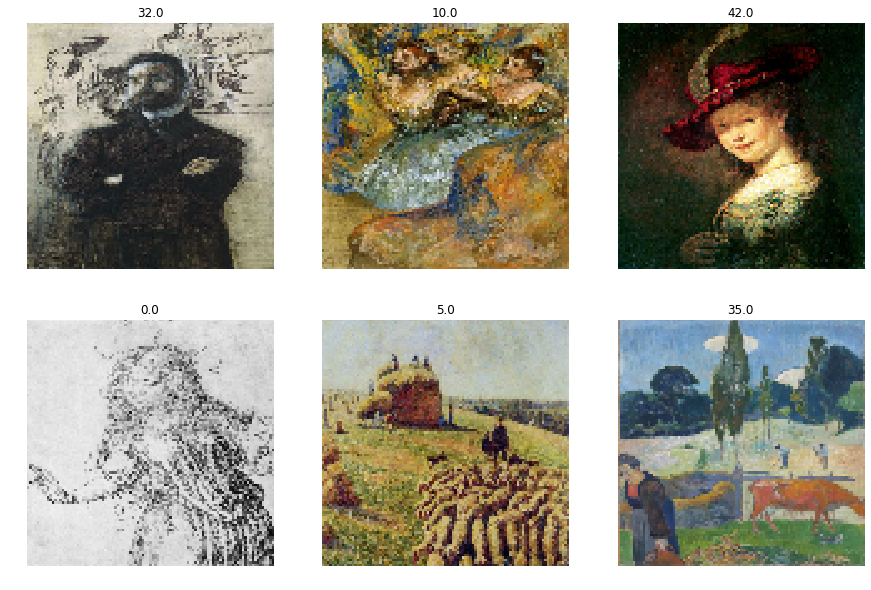

In [45]:
plot_dataset(val_dataset, 2, 3)

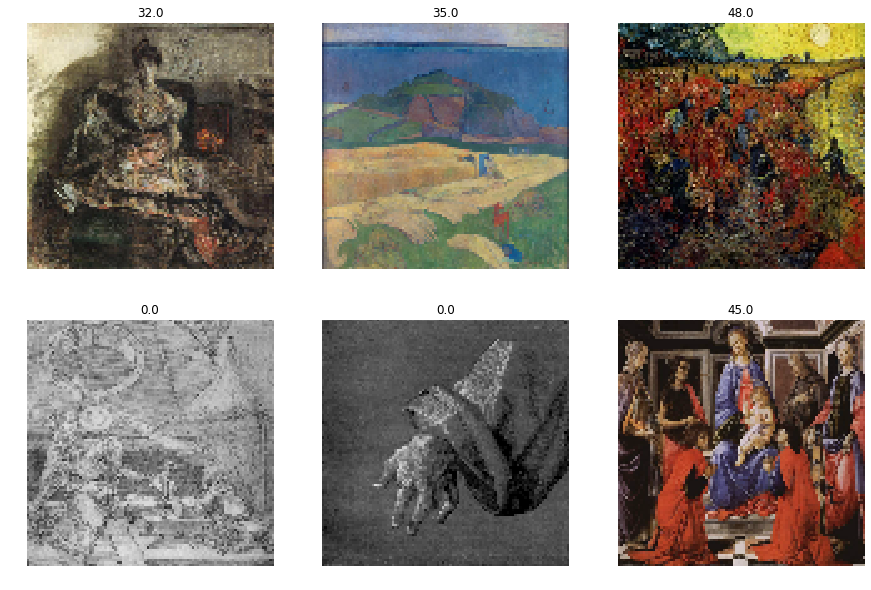

In [46]:
plot_dataset(train_dataset, 2, 3)

In [0]:
from tensorflow.python.keras.layers import Input, Dense

In [0]:
def make_model(
    n_classes,
    input_shape,
    dropout_rate=0.0,
    l1=1e-8,
    l2=1e-8,
):
    base_model = keras.applications.Xception(include_top=False, input_shape=input_shape)
    x = keras.layers.concatenate([
        keras.layers.GlobalAvgPool2D()(base_model.output),
        keras.layers.GlobalMaxPool2D()(base_model.output),
    ])
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(dropout_rate)(x)
    x = keras.layers.Dense(
        n_classes,
        kernel_regularizer=keras.regularizers.l1_l2(l1, l2),
        activation=keras.activations.softmax,
    )(x)
    return keras.Model(inputs=base_model.inputs, outputs=x)

In [0]:
dimensions = [
    skopt.space.Categorical([
        keras.optimizers.Adam,
        keras.optimizers.Nadam,
        keras.optimizers.RMSprop,
    ], name='optimizer'),
    skopt.space.Real(low=1e-6, high=1e-3, prior='log-uniform', name='lr'),
    skopt.space.Real(low=0., high=0.5, name='dropout'),
    skopt.space.Real(low=1e-8, high=1e-2, prior='log-uniform', name='l1_reg'),
    skopt.space.Real(low=1e-8, high=1e-2, prior='log-uniform', name='l2_reg'),
    skopt.space.Integer(low=6, high=30, name='epochs'),
    skopt.space.Integer(low=0, high=10, name='easing_epochs'),
]

In [0]:
default_parameters = [keras.optimizers.Nadam, 3e-4, 0.4, 3e-6, 3e-5, 20, 3]

In [0]:
best_accuracy = 0.0
best_model_arch_path = str(TEMP_DIR/'best_model.json')
best_model_weights_path = str(TEMP_DIR/'best_model.h5')

In [0]:
def train_model(model, optimizer, lr, epochs, easing_epochs):
    if easing_epochs:
        for layer in model.layers[:-1]:
            layer.trainable = False

        model.compile(
            optimizer=optimizer(lr),
            loss=keras.losses.sparse_categorical_crossentropy,
            metrics=[
                keras.metrics.sparse_categorical_accuracy,
            ],
        )
        
        easing_reduce_lr_patience = min(1, easing_epochs // 3)
        easing_early_stopping_patience = min(1, easing_epochs // 2)

        model.fit(
            x=train_dataset,
            steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
            validation_data=val_dataset,
            validation_steps=math.ceil(val_dataset_length/val_batch_size),
            epochs=easing_epochs,
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=easing_reduce_lr_patience),
                keras.callbacks.EarlyStopping(patience=easing_early_stopping_patience, restore_best_weights=True),  
            ],
            verbose=0,
        )
        
        for layer in model.layers:
            layer.trainable = True
        
    model.compile(
        optimizer=optimizer(lr),
        loss=keras.losses.sparse_categorical_crossentropy,
        metrics=[
            keras.metrics.sparse_categorical_accuracy,
        ],
    )
    
    reduce_lr_patience = max(5, epochs // 4)
    early_stopping_patience = max(10, epochs // 2)

    history = model.fit(
        x=train_dataset,
        steps_per_epoch=math.ceil(train_dataset_length/train_batch_size),
        validation_data=val_dataset,
        validation_steps=math.ceil(val_dataset_length/val_batch_size),
        epochs=epochs,
        callbacks=[
            keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=reduce_lr_patience),
            keras.callbacks.EarlyStopping(patience=early_stopping_patience, restore_best_weights=True),  
        ],
        verbose=1,
    )
    
    return history

In [0]:
input_shape = IMG_DIMS + (3,)

@skopt.utils.use_named_args(dimensions=dimensions)
def fitness(
    optimizer,
    lr,
    dropout,
    l1_reg,
    l2_reg,
    epochs,
    easing_epochs,
):  
    model = make_model(
        n_classes,
        input_shape,
        dropout,
        l1_reg,
        l2_reg,
    )
    
    history = train_model(model, optimizer, lr, epochs, easing_epochs)

    accuracy = max(history.history["val_sparse_categorical_accuracy"])

    print("\nAccuracy: {0:.2%}\n".format(accuracy))

    global best_accuracy

    if accuracy > best_accuracy:
        print('Best model'.center(80, '-'))
        print("Accuracy: {0:.4%}".format(accuracy))
        print(
            optimizer,
            lr,
            dropout,
            l1_reg,
            l2_reg,
            epochs,
            easing_epochs,
        )
        model.save_weights(best_model_weights_path)
        with open(best_model_arch_path, "w") as f:
            f.write(model.to_json())
        best_accuracy = accuracy

    del model

    keras.backend.clear_session()

    return -accuracy

In [67]:
search_result = skopt.gp_minimize(
    func=fitness,
    dimensions=dimensions,
    acq_func='EI',
    n_calls=20,
    x0=default_parameters,
)

AttributeError: ignored

In [0]:
def load_model(arch, weights):
    with open(arch, "r") as f:
        model = keras.models.model_from_json(f.read())
    model.load_weights(weights)
    return model

In [56]:
model = load_model(best_model_arch_path, best_model_weights_path)

FileNotFoundError: ignored

In [0]:
model.compile(
    optimizer=keras.optimizers.SGD(1),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=[
        keras.metrics.sparse_categorical_accuracy,
    ],
)

In [0]:
model.evaluate(val_dataset, steps=math.ceil(val_dataset_length/val_batch_size))

In [0]:
val_predictions = model.predict(
    val_dataset,
    steps=math.ceil(val_dataset_length/val_batch_size),
)

In [0]:
val_labels = np.concatenate([
    y.numpy() for _, y in val_dataset.take(math.ceil(val_dataset_length/val_batch_size))
])

In [0]:
print(classification_report(val_labels, val_predictions.argmax(axis=1)))

In [0]:
test_predictions = model.predict(
    test_dataset,
    steps=math.ceil(test_dataset_length/test_batch_size),
)

In [0]:
test_labels = np.concatenate([
    y.numpy() for _, y in test_dataset.take(math.ceil(test_dataset_length/test_batch_size))
])

In [0]:
print(classification_report(test_labels, test_predictions.argmax(axis=1)))

In [0]:
IMG_DIMS = (299, 299)

In [0]:
train_dataset, train_dataset_length, train_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"car_data/train"/f"{getattr(row, image_path_col)}") for row in train_df.itertuples()]),
    y=label_pipeline.transform(train_df[target_col]),
    batch_size=8,
    parse_fn=image_parse,
    augment_fn=partial(augment, level=2),
    mode="stretch",
    shuffle=True,
    num_parallel_calls=2,
)

In [0]:
val_dataset, val_dataset_length, val_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"car_data/test"/f"{getattr(row, image_path_col)}") for row in val_df.itertuples()]),
    y=label_pipeline.transform(val_df[target_col]),
    batch_size=8,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="stretch",
    shuffle=False,
    num_parallel_calls=2,
)

In [0]:
test_dataset, test_dataset_length, test_batch_size = prepare_ds(
    x=np.array([str(DATA_DIR/"car_data/test"/f"{getattr(row, image_path_col)}") for row in test_df.itertuples()]),
    y=label_pipeline.transform(test_df[target_col]),
    batch_size=8,
    parse_fn=image_parse,
    augment_fn=augment,
    mode="stretch",
    shuffle=False,
    num_parallel_calls=2,
)

In [0]:
{key.name: value for key, value in zip(dimensions, search_result.x)}

In [0]:
input_shape = IMG_DIMS + (3,)

model = make_model(
    n_classes=n_classes,
    input_shape=input_shape,
    dropout_rate=0.2,
    l1=3e-6,
    l2=3e-4,
)

In [0]:
history = train_model(
    model=model,
    optimizer=keras.optimizers.Adam,
    lr=5e-4,
    epochs=40,
    easing_epochs=3,
)

In [0]:
model.evaluate(val_dataset, steps=math.ceil(val_dataset_length/val_batch_size))

In [0]:
model.evaluate(test_dataset, steps=math.ceil(test_dataset_length/test_batch_size))